### This notebook is for an in-class Kaggle competetion: Predict whether a Stack Overflow question will be closed

####1) importing pandas, reading the file, examining data

In [1]:
import pandas as pd

train = pd.read_table('train.csv', sep=',')


#drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

In [2]:
train.Tag2.head() # potential feature, number of tags without NaNs? Concanate all tags into a list?

0                NaN
1                xsd
2    database-design
3             vb.net
4        spring-data
Name: Tag2, dtype: object

In [63]:
train.head(2)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,Answers,Title,BodyMarkdown,Tag1,Tag2,...,Tag5,PostClosedDate,OpenStatus,TitleLength,BodyLength,NumTags,OwnerAge,Tag1_enc,sentiment,Tag2_enc
0,6046168,2011-05-18 14:14:05,543315,2010-09-17 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,...,NaN,NaN,1,76,504,1,243,2776,0.285714,0
1,4873911,2011-02-02 11:30:10,465076,2010-10-03 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,...,NaN,NaN,1,54,957,3,122,1199,0.157576,9200


In [4]:
train.isnull().sum()

Unnamed: 0                                  0
PostId                                      0
PostCreationDate                            0
OwnerUserId                                 0
OwnerCreationDate                           0
ReputationAtPostCreation                    0
OwnerUndeletedAnswerCountAtPostTime         0
Title                                       0
BodyMarkdown                                0
Tag1                                        2
Tag2                                    27228
Tag3                                    64328
Tag4                                   100609
Tag5                                   124555
PostClosedDate                          70136
OpenStatus                                  0
dtype: int64

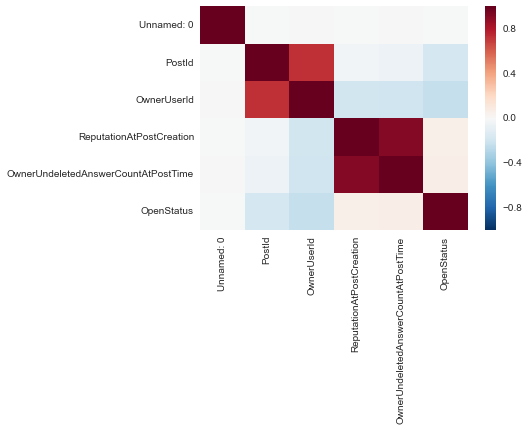

In [5]:
import seaborn as sns
import matplotlib.pyplot as plot

%matplotlib inline
sns.heatmap(train.corr())

####2 Feature Engineering

In [6]:
train['tags'] = train[train.Tag1.notnull() == False].Tag1 + train[train.Tag2.isnull() == False].Tag2 \
                + train[train.Tag3.isnull() == False].Tag3 \
    + train[train.Tag4.isnull() == False].Tag4 \
    + train[train.Tag5.isnull() == False].Tag5 


#merge tags into one tag field, count the length of tags
#see if time of post creation is relavent feature at all.. 
'''g = sns.pairplot(iris, size=3,
...                  vars=["sepal_width", "sepal_length"])'''


'g = sns.pairplot(iris, size=3,\n...                  vars=["sepal_width", "sepal_length"])'

In [8]:
#Owner user id related to no of open posts?

train.OwnerUserId.value_counts()

466534     66
39677      51
34537      46
310291     46
32484      45
84201      43
117700     41
4653       40
179736     39
237681     38
325418     37
656925     30
11236      30
554217     29
244413     29
63051      29
496949     27
51816      27
136141     26
54964      26
233421     26
508127     26
149080     25
434051     25
651174     25
108207     25
185593     25
164299     25
478144     24
478573     24
           ..
1174386     1
1151869     1
107444      1
1149822     1
1467267     1
672647      1
408456      1
1180559     1
187284      1
965528      1
584530      1
64336       1
21317       1
225876      1
455441      1
713491      1
1231638     1
697115      1
226081      1
744228      1
866308      1
469802      1
1254187     1
1555256     1
573590      1
764730      1
632600      1
758589      1
1018686     1
1555040     1
dtype: int64

In [9]:
train[train.OwnerUserId == 34537].describe()

,Unnamed: 0,PostId,OwnerUserId,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,OpenStatus
count,46.000000,46.000000,46,46.000000,46.000000,46.000000
mean,80095.608696,4387690.173913,34537,6571.826087,110.869565,0.695652
std,41939.321831,3019610.771118,0,4254.098324,52.477978,0.465215
min,6058.000000,284189.000000,34537,57.000000,2.000000,0.000000
25%,38382.000000,2003785.750000,34537,2981.000000,64.500000,0.000000
50%,91997.500000,3461372.500000,34537,6015.000000,124.000000,1.000000
75%,118156.750000,6435361.250000,34537,10002.000000,157.500000,1.000000
max,137664.000000,10687085.000000,34537,14636.000000,175.000000,1.000000


Mostly closed questions #466534
MOstly open #39677

In [10]:
train[train.OwnerUserId == 34537].head()

,Unnamed: 0,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus,tags
6058,6058,1613617,10/23/2009 13:53:58,34537,11/05/2008 03:00:23,2610,49,script to add files to SVN with filters,My bash scripting is weak. I want to create a ...,svn,bash,scripting,regex,NaN,NaN,1,NaN
6122,6122,8398958,12/06/2011 11:11:38,34537,11/05/2008 03:00:23,12165,167,Trick Firefox into using pretty URLs?,"In short, i am using an extension that depends...",firefox,hack,NaN,NaN,NaN,12/14/2011 20:41:16,0,NaN
8861,8861,5556183,04/05/2011 17:51:22,34537,11/05/2008 03:00:23,8485,153,Make C++ crash without casting?,What are possible ways to make C/C++ crash **w...,c++,c,NaN,NaN,NaN,04/07/2011 01:09:16,0,NaN
10287,10287,471791,01/23/2009 03:23:02,34537,11/05/2008 03:00:23,505,13,gcc compile time notes/msg,I know msvc can do this via pragma message -> ...,compiler-warnings,gcc,NaN,NaN,NaN,NaN,1,NaN
13184,13184,6159955,05/28/2011 06:01:02,34537,11/05/2008 03:00:23,9139,155,C++ Templates: Byval/Reference interfering wit...,Here's a simplified version of my problem. I h...,c++,templates,NaN,NaN,NaN,NaN,1,NaN


In [11]:
train.groupby('OpenStatus').ReputationAtPostCreation.describe()

OpenStatus       
0           count     70136.000000
            mean        355.813063
            std        1917.610162
            min         -17.000000
            25%           1.000000
            50%          18.000000
            75%         148.000000
            max      123242.000000
1           count     70136.000000
            mean        657.454745
            std        2955.744169
            min         -34.000000
            25%           6.000000
            50%          64.000000
            75%         394.000000
            max      209631.000000
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115e70f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x106ee3450>], dtype=object)

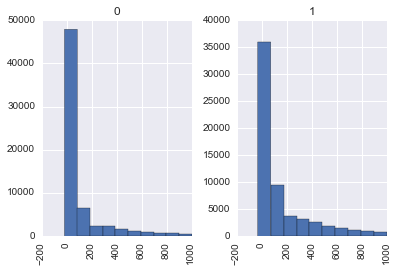

In [12]:
train[train.ReputationAtPostCreation < 1000].ReputationAtPostCreation.hist(by=train.OpenStatus) #default histogram is bad

In [2]:
train.rename(columns={'OwnerUndeletedAnswerCountAtPostTime':'Answers'}, inplace = True)

In [14]:
train.groupby('OpenStatus').Answers.describe()

OpenStatus       
0           count    70136.000000
            mean        13.529956
            std         72.280095
            min          0.000000
            25%          0.000000
            50%          0.000000
            75%          5.000000
            max       5772.000000
1           count    70136.000000
            mean        25.405826
            std        104.635848
            min          0.000000
            25%          0.000000
            50%          2.000000
            75%         13.000000
            max       5117.000000
dtype: float64

In [3]:
def make_features(filename):
    df = pd.read_csv(filename, index_col = 0)
    df.rename(columns={'OwnerUndeletedAnswerCountAtPostTime':'Answers' }, inplace = True)
    return df
#to ensure train and test have same features

In [4]:
train = make_features('train.csv')
test = make_features('test.csv')

In [5]:
#useful during feature engineering 

feature_cols = ['ReputationAtPostCreation', 'Answers']
X=train[feature_cols]
y=train.OpenStatus

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
logreg.coef_

array([[  3.23003325e-05,   1.67855859e-03]])

In [7]:
#the cofficients look good, positive correlation

y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
#evaluation metrics

#confusion matrix; AUC; log_loss; predictb

In [8]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.log_loss(y_test, y_pred_prob)

0.542659974906
[[15098  2413]
 [13625  3932]]
0.607036068463
0.689967730114


In [9]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='log_loss').mean()

-0.6901647600716323

In [10]:

logreg.fit(X,y)
X_oos = test[feature_cols]
oos_pred_prob = logreg.predict_proba(X_oos)[:,1]


sub = pd.DataFrame({'id':test.index, 'OpenStatus':oos_pred_prob}).set_index('id')
sub.to_csv('sub_ensemble.csv')

In [11]:
train['BodyLength'] = train.BodyMarkdown.apply(len)
train['TitleLength'] = train.Title.apply(len)


In [12]:
train.groupby('Tag1').OpenStatus.mean()

Tag1
#visualstudio         0.000000
.bat                  1.000000
.cpp                  0.000000
.exe                  1.000000
.htaccess             0.572864
.net                  0.549550
.net-1.1              1.000000
.net-2.0              0.625000
.net-3.5              0.750000
.net-4.0              1.000000
.net-framework-4.0    0.000000
.net1.1               1.000000
.net3.5sp1            1.000000
.netcf                1.000000
.netremoting          1.000000
256                   1.000000
2d                    0.250000
2d-array              1.000000
32bit-64bit           0.200000
3d                    0.424242
3ds                   0.000000
3dsmax                0.333333
3g                    0.000000
64bit                 0.800000
70-536                0.500000
7zip                  0.000000
802.11                1.000000
8051                  0.000000
8086                  1.000000
80x86                 0.000000
                        ...   
yql                   0.000000
yui

In [13]:
train['NumTags'] = train.loc[:, 'Tag1':'Tag5'].notnull().sum(axis = 1)

###difference between time post created and Q posted

In [14]:
train['OwnerCreationDate'] = pd.to_datetime(train.OwnerCreationDate)
train['PostCreationDate'] = pd.to_datetime(train.PostCreationDate)

In [15]:
train['OwnerAge'] = (train.PostCreationDate - train.OwnerCreationDate).dt.days

In [16]:
train.groupby('OpenStatus').BodyLength.describe()

OpenStatus       
0           count    70136.000000
            mean       700.580829
            std       1633.567536
            min         13.000000
            25%        205.000000
            50%        365.000000
            75%        677.000000
            max      30804.000000
1           count    70136.000000
            mean       960.725091
            std       1284.169671
            min         12.000000
            25%        359.000000
            50%        624.000000
            75%       1098.000000
            max      30024.000000
dtype: float64

In [17]:
'''
Update make_features and create another submission file
'''

# update the function
def make_features(filename):
    df = pd.read_csv(filename, index_col=0)
    df.rename(columns={'OwnerUndeletedAnswerCountAtPostTime':'Answers'}, inplace=True)
    df['TitleLength'] = df.Title.apply(len)
    df['BodyLength'] = df.BodyMarkdown.apply(len)
    df['NumTags'] = df.loc[:, 'Tag1':'Tag5'].notnull().sum(axis=1)
    df['OwnerCreationDate'] = pd.to_datetime(df.OwnerCreationDate)
    df['PostCreationDate'] = pd.to_datetime(df.PostCreationDate)
    df['OwnerAge'] = (df.PostCreationDate - df.OwnerCreationDate).dt.days
    return df

In [18]:
# apply function to both training and testing files
train = make_features('train.csv')
test = make_features('test.csv')

In [19]:
# train the model with OwnerUserId
feature_cols = ['ReputationAtPostCreation', 'Answers', 'TitleLength', 'BodyLength', 'NumTags', 'OwnerUserId']
X = train[feature_cols]
logreg.fit(X, y)

# predict class probabilities for the actual testing data
X_oos = test[feature_cols]
oos_pred_prob00 = logreg.predict_proba(X_oos)[:, 1]


# create submission file
##sub = pd.DataFrame({'id':test.index, 'OpenStatus':oos_pred_prob}).set_index('id')
##sub.to_csv('sub2.csv')  # 0.864

In [20]:
# repeat with OwnerAge
feature_cols = ['ReputationAtPostCreation', 'Answers', 'TitleLength', 'BodyLength', 'NumTags', 'OwnerAge']
X = train[feature_cols]
logreg.fit(X, y)
X_oos = test[feature_cols]
oos_pred_prob_0 = logreg.predict_proba(X_oos)[:, 1]
#sub = pd.DataFrame({'id':test.index, 'OpenStatus':oos_pred_prob}).set_index('id')
#sub.to_csv('sub3.csv')  # 0.637

# OwnerUserId overfits the training data, whereas OwnerAge does not
train.PostCreationDate.describe()
test.PostCreationDate.describe()

count                   73290
unique                  70650
top       2012-08-13 21:13:52
freq                        4
first     2012-08-01 00:00:17
last      2012-08-14 23:59:04
Name: PostCreationDate, dtype: object

In [21]:
'''
Build a document-term matrix from Title using CountVectorizer
'''

# use CountVectorizer with the default settings
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
dtm = vect.fit_transform(train.Title)

# cross-validation of a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
cross_val_score(nb, dtm, train.OpenStatus, scoring='log_loss', cv=10).mean()    # 0.657

# tune CountVectorizer and repeat Naive Bayes
vect = CountVectorizer(stop_words='english')
dtm = vect.fit_transform(train.Title)
cross_val_score(nb, dtm, train.OpenStatus, scoring='log_loss', cv=10).mean()    # 0.635

# build document-term matrix for the actual testing data and make predictions
oos_dtm = vect.transform(test.Title)
nb.fit(dtm, train.OpenStatus)
oos_pred_prob_1 = nb.predict_proba(oos_dtm)[:, 1]


In [22]:
'''
Dummy encoding of Tag1
'''

# number of unique tags for Tag1
train.Tag1.nunique()

# convert Tag1 from strings to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Tag1_enc'] = le.fit_transform(train.Tag1)

# confirm that the conversion worked
train.Tag1.value_counts().head()
train.Tag1_enc.value_counts().head()

# create a dummy column for each value of Tag1_enc (returns a sparse matrix)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
tag1_dummies = ohe.fit_transform(train[['Tag1_enc']])
tag1_dummies

# try a Naive Bayes model with tag1_dummies as the features
cross_val_score(nb, tag1_dummies, train.OpenStatus, scoring='log_loss', cv=10).mean()   # 0.650

# adjust Tag1 on testing set since LabelEncoder errors on new values during a transform
test['Tag1'] = test['Tag1'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
import numpy as np
le.classes_ = np.append(le.classes_, '<unknown>')

# apply the same encoding to the actual testing data and make predictions
test['Tag1_enc'] = le.transform(test.Tag1)
oos_tag1_dummies = ohe.transform(test[['Tag1_enc']])
nb.fit(tag1_dummies, train.OpenStatus)
oos_pred_prob_2 = nb.predict_proba(oos_tag1_dummies)[:, 1]


//anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [23]:
#examining sentimnet as a potential feature
from textblob import TextBlob, Word
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

# create a new DataFrame column for sentiment
train['sentiment'] = train.BodyMarkdown.apply(detect_sentiment)
test['sentiment'] = test.BodyMarkdown.apply(detect_sentiment)



In [24]:
feature_cols = ['ReputationAtPostCreation', 'Answers', 'TitleLength', 'BodyLength', 'NumTags', 'OwnerAge', 'sentiment']
X = train[feature_cols]
logreg.fit(X, y)
X_oos = test[feature_cols]

oos_pred_prob_3 = logreg.predict_proba(X_oos)[:, 1]

In [25]:
##lowercase vs closed qs
train['TitleLowercase'] = (train.Title.str.lower() == train.Title).astype(int)
train['BodyLowercase'] = (train.BodyMarkdown.str.lower() == train.BodyMarkdown).astype(int)


test['TitleLowercase'] = (train.Title.str.lower() == train.Title).astype(int)
test['BodyLowercase'] = (train.BodyMarkdown.str.lower() == train.BodyMarkdown).astype(int)
    
#-.66

In [26]:
train['TitleQuestion'] = train.Title.str.contains('question', case=False).astype(int)
train['TitleNeed'] = train.Title.str.contains('need', case=False).astype(int)
train['TitleHelp'] = train.Title.str.contains('help', case=False).astype(int)

test['TitleQuestion'] = test.Title.str.contains('question', case=False).astype(int)
test['TitleNeed'] = test.Title.str.contains('need', case=False).astype(int)
test['TitleHelp'] = test.Title.str.contains('help', case=False).astype(int)

In [27]:
feature_cols = ['ReputationAtPostCreation', 'Answers', 'TitleLength', 'BodyLength', 'NumTags', 'OwnerAge', \
                'sentiment', 'TitleLowercase', 'BodyLowercase', 'TitleQuestion', 'TitleNeed', 'TitleHelp' \
               ]
X = train[feature_cols]

cross_val_score(logreg, X, y, cv=10, scoring='log_loss').mean()

-0.66597142699717571

In [34]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=10000)
dtm = vect.fit_transform(train.BodyMarkdown)
nb = MultinomialNB()
dtm = vect.fit_transform(train.BodyMarkdown)
print cross_val_score(nb, dtm, train.OpenStatus, scoring='log_loss', cv=10).mean()    # 0.635

-2.55081120548


In [35]:
# build document-term matrix for the actual testing data and make predictions
oos_dtm = vect.transform(test.BodyMarkdown)
nb.fit(dtm, train.OpenStatus)
oos_pred_prob_4 = nb.predict_proba(oos_dtm)[:, 1]

###Piping

In [30]:
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(CountVectorizer(stop_words='english'), LogisticRegression())

In [31]:
#Perform cross validation to get an idea of the performance of the model
cross_val_score(pipe, train['Title'], y, scoring="log_loss", cv=5).mean()

-0.57211851986201612

In [32]:
# Predict class probabilities for the actual testing data
pipe.fit(train['Title'], y)
y_prob_pipe = pipe.predict_proba(test['Title'])[:, 1]

In [2]:
#Create submission

# Ensemble predictions
'''
y_prob_combined = (oos_pred_prob_0  + oos_pred_prob_1 + oos_pred_prob_3 + 3*y_prob_pipe) / 4

# Create a DataFrame that has 'id' as the index, then export to a CSV file
sub = pd.DataFrame({'id':test.index, 'OpenStatus':y_prob_combined}).set_index('id')
sub.to_csv('sub_ensemble_inclass.csv')
'''

y_prob_combined = (oos_pred_prob_0  + oos_pred_prob_1 + oos_pred_prob_4 + 3*y_prob_pipe) / 4

# Create a DataFrame that has 'id' as the index, then export to a CSV file
sub = pd.DataFrame({'id':test.index, 'OpenStatus':y_prob_combined}).set_index('id')
sub.to_csv('sub_ensemble_inclass_3.csv')

NameError: name 'oos_pred_prob_0' is not defined